> <font size="4"> Both analytical and Computing is done here itself.<font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import decimal 
np.set_printoptions(threshold=sys.maxsize)

### 1(i)
<font size="4">$\nabla^2$V = 0 is the laplace equation.<br>
$\Rightarrow \frac{\partial^2 V}{\partial x^2}$ + $\frac{\partial^2 V}{\partial y^2}$ + $\frac{\partial^2 V}{\partial z^2}$ = 0.<br>
$\nabla^2$($x^2+y^2$) = $\frac{\partial^2 x^2}{\partial x^2}$ + $\frac{\partial^2 y^2}{\partial y^2}$ = 2+2 $\neq$ 0.<font>
> The function $x^2+y^2$ does not satisfy laplace equation.

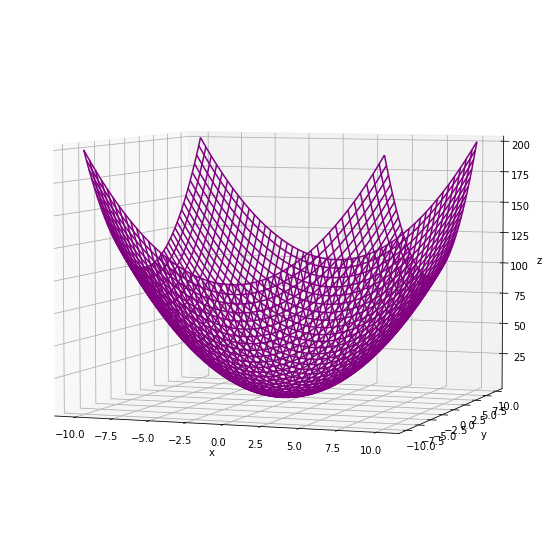

In [2]:
a = np.linspace(-10, 10, 300)
b = np.linspace(-10, 10, 300)
def z_function(x, y):
    return x ** 2 + y ** 2
A, B = np.meshgrid(a, b)
Z = z_function(A, B)
fig1 = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")
ax.plot_wireframe(A, B, Z, color='purple')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=-70,elev=5)

###            3D-plot of $x^2$+$y^2$ from side view.
> The minima occurs at (0,0) here.

### 1(ii)
<font size="4">$\nabla^2$($x^2-y^2$) = $\frac{\partial^2 x^2}{\partial x^2}$ - $\frac{\partial^2 y^2}{\partial y^2}$ = 2-2 = 0.<font>
> The function <font size="4">$x^2-y^2$  <font>satisfies the laplace equation.

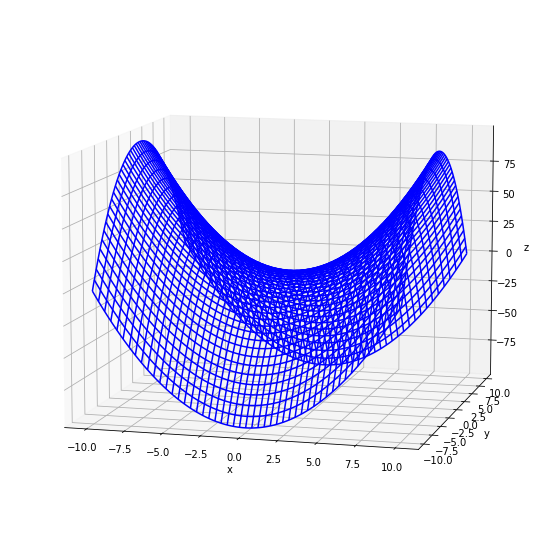

In [3]:
a = np.linspace(-10, 10, 300)
b = np.linspace(-10, 10, 300)
def z_function(x, y):
    return x ** 2 - y ** 2
A, B = np.meshgrid(a, b)
Z = z_function(A, B)
fig1 = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")
ax.plot_wireframe(A, B, Z, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=-75,elev=10)


###            3D-plot of $x^2$-$y^2$ from side view.

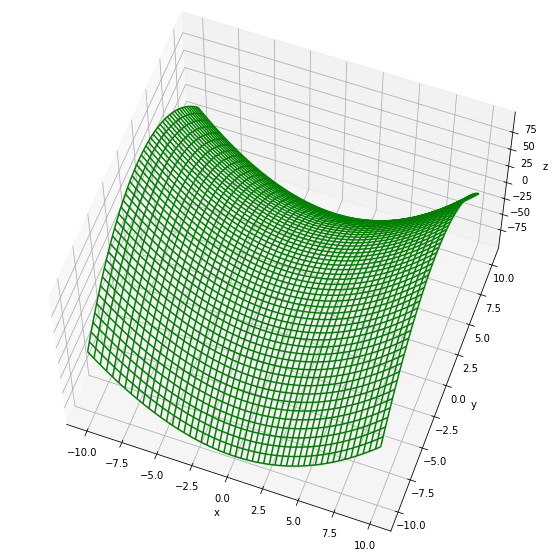

In [4]:
fig2 = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")
ax.plot_wireframe(A, B, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=-70,elev=60)
plt.show()

###            3D-plot of $x^2$-$y^2$ from Top view.
> It's seems like Point (0,0) is minimum as x varies and maximum as y varies.<br>
> Therefore (0,0) is neither a minima nor a maxima and it's called saddle point.<br>
> The maxima and minima are at infinities,so we can say they only occur at boundaries.


### 2.(a)
> Here the potential V doesn't change with radius($\rho$) and z with spherical coordinates and only depends on $\phi$.<br>
<font size="4"> ${\nabla^2V = \frac{1}{\rho^2}\frac{\partial^2 V}{\partial \phi^2}}$  <br>
> $\frac{\partial^2 V}{\partial \phi^2}$ = 0. </font>  <br><br>
> V = A$\phi$+B.<br><br>
> Applying boundary conditions i.e when $\phi$ = 0, V = 0 and $\phi$ = $45^o$, V = $V_0$.<br><br>
> <font size="4"> A=$\frac{4V_0}{\pi}$, B=0.</font> 
### 2.(b)
> <font size="4"> E = -$\nabla$V = -$\frac{1}{\rho}\frac{\partial V}{\partial \phi} \hat{\phi}$= -$\frac{4V_0}{\rho\pi}\hat{\phi}$.<br><br>
> surface charge density $\sigma(\rho)=\epsilon_0E(\rho,\phi=0)$.(From Gauss law)<br><br>
> $\sigma(\rho) = -\frac{\epsilon_04V_0}{\rho\pi}$

### 3
> Using second order difference scheme.<br><br>
<font size="4"> $\frac{\partial^2 V}{\partial x^2} \approx \frac{V_{i-1,j}-2V_{i,j}+V_{i+1,j}}{\Delta x^2}$</font> <br><br>
<font size="4"> $\frac{\partial^2 V}{\partial y^2} \approx \frac{V_{i,j-1}-2V_{i,j}+V_{i,j+1}}{\Delta y^2}$</font> <br><br>
> Using $\Delta x$ = $\Delta y$ and Laplace equation we get, <br><br>
<font size="4"> $V_{i,j} = \frac{V_{i-1,j} + V_{i+1,j} + V_{i,j-1} + V_{i,j+1}}{4}$ <font>

In [19]:
n=100
Itr=10000
Err_J=np.zeros(shape = (Itr), dtype = np.float)
tolerence=1e-4
x=np.linspace(0,1,n)
y=np.linspace(0,1,n)
phi = np.zeros((n,n))
phi_np1 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i+j==n-1:
            phi[i][j]=1
        elif j==n-1:
            phi[i][j]=(n-1-i)/(n-1-i+(i/np.sqrt(2)))
        else: 
            phi[i][j]=0
phi_np1 = phi.copy() 
def Res(data):
    n = len(data)
    RS = data[2:n-1,1:n-2]
    LS = data[2:n-1,3:n]
    BS = data[3:n,2:n-1]
    TS = data[1:n-2,2:n-1]
    Res = 0.25*(LS+BS+RS+TS) 
    for i in range(n-3):
        for j in range(n-3):
            if (i+j) < (n-4):
                Res[i,j] = 0 
    for i in range(n-3):
        for j in range(n-3):
            if (i+j) == (n-5):
                Res[i,j]=1             
    return(Res)

> <font size="4">Here we will take two cases one where the boundary at infinity is predefined and the other is we obtain it by averaging 3 points around it which may lead to an error. <br><br>
> Case 1: By averaging at infinity i.e technically the last column of grid .<font>

No of iterations :  8350


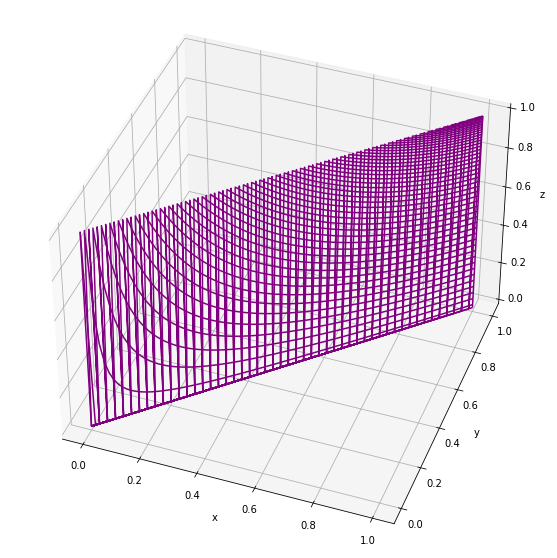

In [34]:
for i in range(Itr):
    phi_np1[2:n-1,2:n-1] = (Res(phi_np1))
    phi_np1[1:n-1,n-1] = 1/3*(phi_np1[1:n-1,n-2]+phi_np1[2:n,n-1]+phi_np1[0:n-2,n-1])
    err0 = phi_np1-phi;
    err0 = err0**2
    Err_J[i] = np.sqrt(np.sum(err0))
    phi = phi_np1.copy()
    if Err_J[i]<tolerence:
        break
    idx=i 
print("No of iterations : ",idx)
fig1 = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")
ax.plot_wireframe( x,y,phi_np1, color='purple')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=-70,elev=40)

> Here we have taken a grid of 100x100 and have obtained reasonable convergence for 8350 iterations. 

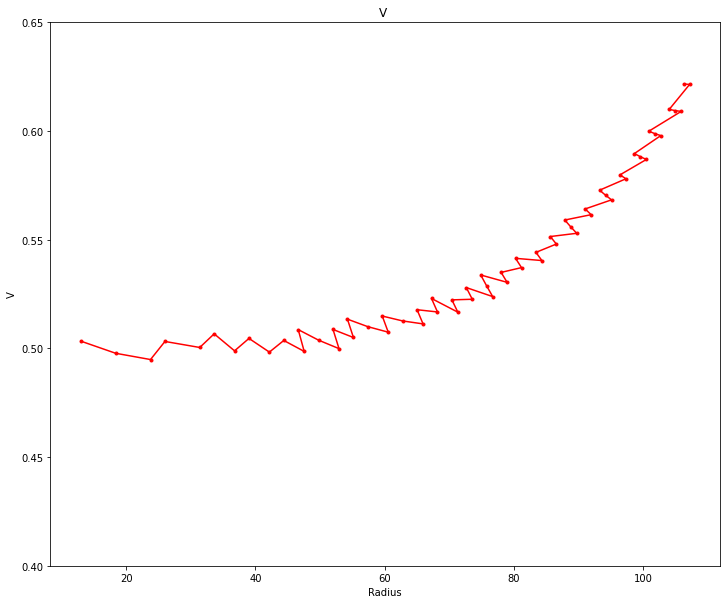

In [7]:
A=[]
B=[]
for i in range(n):
    for j in range(n):
        if np.angle(j+(1j*(n-1-i)),deg=True) > 22.2 and np.angle(j+(1j*(n-1-i)),deg=True) <= 22.8:
            A+=[(i,j)] 
            B+=[abs(j+(1j*(n-1-i)))]
A=A[::-1]
B=B[::-1]
Half=np.zeros(len(A))
for i in range(len(A)):
    Half[i]=phi_np1[A[i][0],A[i][1]]
figure=plt.figure(figsize=(12,10))
plt.plot(B,Half,'r-o',markersize=3)
plt.title('V ')
plt.xlabel('Radius')
plt.ylabel('V')
plt.ylim([0.40, 0.65])
plt.show()

> <font size="3"> Here as radius increases the value is deviated from 0.5 because of the infinity boundary problem.<font> 

> <font size="3"> Case 2 : By taking predefined values at infinity technically the last column of grid .<font>

In [8]:
for i in range(Itr):
    phi_np1[2:n-1,2:n-1] = (Res(phi_np1))
    #phi_np1[1:n-1,n-1] = 1/3*(phi_np1[1:n-1,n-2]+phi_np1[2:n,n-1]+phi_np1[0:n-2,n-1])
    err0 = phi_np1-phi;
    err0 = err0**2
    Err_J[i] = np.sqrt(np.sum(err0))
    phi = phi_np1.copy()
    if Err_J[i]<tolerence:
        break
    idx=i 
print("No of iterations : ",idx)  

No of iterations :  8350


> Here we have taken a grid of 100x100 and have obtained reasonable convergence in this case is for 4850 iterations. 

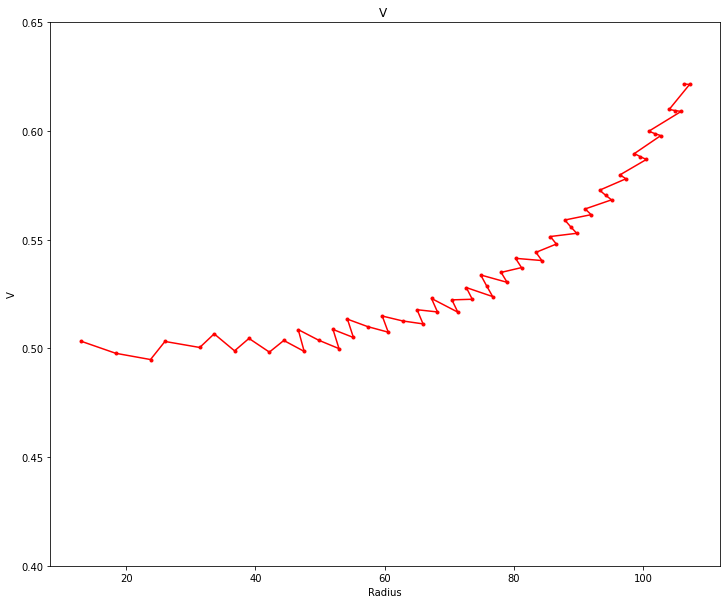

In [9]:
A=[]
B=[]
for i in range(n):
    for j in range(n):
        if np.angle(j+(1j*(n-1-i)),deg=True) > 22.2 and np.angle(j+(1j*(n-1-i)),deg=True) <= 22.8:
            A+=[(i,j)] 
            B+=[abs(j+(1j*(n-1-i)))]
A=A[::-1]
B=B[::-1]
Half=np.zeros(len(A))
for i in range(len(A)):
    Half[i]=phi_np1[A[i][0],A[i][1]]
figure=plt.figure(figsize=(12,10))
plt.plot(B,Half,'r-o',markersize=3)
plt.title('V ')
plt.xlabel('Radius')
plt.ylabel('V')
plt.ylim([0.40, 0.65])
plt.show()

> As we can see that the  potential Value is around 0.5 which is close to analytical value 0.5 at $\phi$ = $22.5^o$

### 4  
> <font size="4"> Forward difference approximation : <font ><br><br>
$f"(x)$ = $\frac{f(x+2h)-2f(x+h)+f(x)}{h^2} +O(h)$ <br><br>
> <font size="4"> Central difference approximation :<font ><br><br>
$f"(x)$ = $\frac{f(x+h)-2f(x)+f(x-h)}{h^2}+O(h)$  <br><br>
> Here  $O(h) \rightarrow$ 0 as h $\rightarrow$ 0

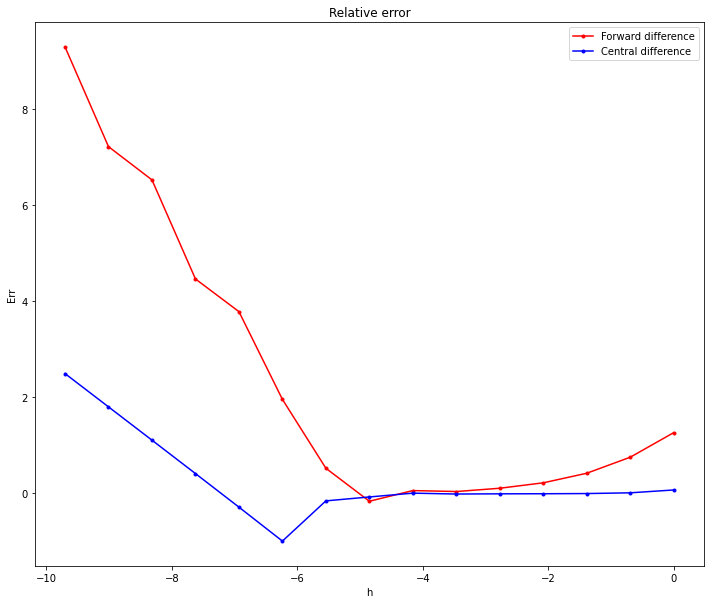

In [10]:
x=2
J=15
decimal.getcontext().prec = 5
def f(x):
    f=decimal.Decimal(4*(x**4)+(x**2)-x+3)
    return(f)
def fdprim(x):
    fdprim=decimal.Decimal(48*(x)+2)
    return(fdprim)
h=np.zeros(J)
for i in range(J):
    h[i]=decimal.Decimal(1/(2**i))   
#Forward difference and central difference approximation.
Err=np.zeros(J)
Err2=np.zeros(J)
Na=np.zeros(J)
Nm=np.zeros(J)
for i in range(len(h)):
    Na[i]=((f(x+2*h[i])-(decimal.Decimal(2)*f(x+h[i]))+f(x))/(decimal.Decimal(h[i]**2)))
    Err[i]=abs(decimal.Decimal(Na[i])-decimal.Decimal(fdprim(x)))/decimal.Decimal(fdprim(x))
    Nm[i]=((f(x+h[i])-(decimal.Decimal(2)*f(x))+f(x-h[i]))/(decimal.Decimal(h[i]**2)))
    Err2[i]=abs(decimal.Decimal(Nm[i])-decimal.Decimal(fdprim(x)))/decimal.Decimal(fdprim(x))   
figure1=plt.figure(figsize=(12,10))
plt.plot(np.log(h),np.log((Err)),'r-o',markersize=3)
plt.plot(np.log(h),np.log((Err2)),'b-o',markersize=3)
plt.legend(["Forward difference", "Central difference"])
plt.title('Relative error')
plt.xlabel('h')
plt.ylabel('Err')
plt.show()

> <font size="3">  As we can see that the relative error decreases as h step size is decreases upto some point and from that the relative error increases,this is the effect of precision problem.<font> 

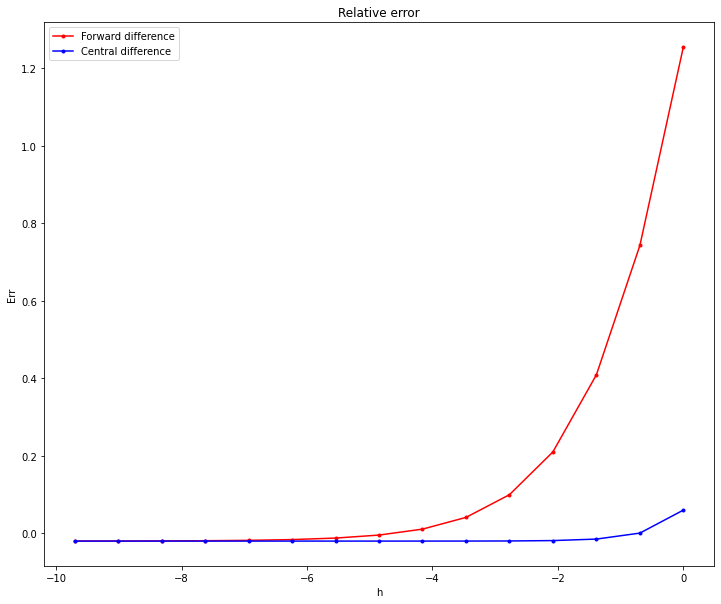

In [11]:
decimal.getcontext().prec = 50
def f(x):
    f=decimal.Decimal(4*(x**4)+(x**2)-x+3)
    return(f)
def fdprim(x):
    fdprim=decimal.Decimal(48*(x)+2)
    return(fdprim)
h=np.zeros(J)
for i in range(J):
    h[i]=decimal.Decimal(1/(2**i))   
#Forward difference and central difference approximation.
Err=np.zeros(J)
Err2=np.zeros(J)
Na=np.zeros(J)
Nm=np.zeros(J)
for i in range(len(h)):
    Na[i]=((f(x+2*h[i])-(decimal.Decimal(2)*f(x+h[i]))+f(x))/(decimal.Decimal(h[i]**2)))
    Err[i]=abs(decimal.Decimal(Na[i])-decimal.Decimal(fdprim(x)))/decimal.Decimal(fdprim(x))
    Nm[i]=((f(x+h[i])-(decimal.Decimal(2)*f(x))+f(x-h[i]))/(decimal.Decimal(h[i]**2)))
    Err2[i]=abs(decimal.Decimal(Nm[i])-decimal.Decimal(fdprim(x)))/decimal.Decimal(fdprim(x))   
figure1=plt.figure(figsize=(12,10))
plt.plot(np.log(h),np.log((Err)),'r-o',markersize=3)
plt.plot(np.log(h),np.log((Err2)),'b-o',markersize=3)
plt.legend(["Forward difference", "Central difference"])
plt.title('Relative error')
plt.xlabel('h')
plt.ylabel('Err')
plt.show()

> <font size="3">  We have increased the precision and we can see that the relative error now decreases as h step size is decreased.<font><br> <br>
> We can also see that the central difference approximation has given better result at a little high step-size compared to forward difference approximation.

### ROLL NO: EE19BTECH11041
### NAME : SRIJITH REDDY PAKALA